<a href="https://colab.research.google.com/github/SophiaVei/Community-Detection/blob/main/sna_partb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Community Detection in Twitter Dataset






>[Community Detection in Twitter Dataset](#scrollTo=pDZTAP-NIccQ)

>>[1.Data Preparation and Visualization](#scrollTo=3pR4K7TxX7_h)

>>>[1.1 Import the Graph(s)](#scrollTo=jX2Qh2_H2-GL)

>>>[1.2 Keep giant component](#scrollTo=R4IWAHhMzxyD)

>>>[1.3 Visualization of the graph(s)](#scrollTo=binzhRzkRA7o)

>>[2.Implementation of the algorithms](#scrollTo=Z9na81ib0xKW)

>>>[2.1 Louvain](#scrollTo=tTgdml6nV4da)

>>>>[Code](#scrollTo=fsQM53gI-zle)

>>>>[Modularity](#scrollTo=hT2Pjj5B-4ey)

>>>>[Investigation of the Three Largest Communities](#scrollTo=UH4ekKFD-7RT)

>>>>>[First Largest Community](#scrollTo=zLCq56WOA23b)

>>>>>[Second Largest Community](#scrollTo=yQfj6s_oA51q)

>>>>>[Third Largest Community](#scrollTo=8YYBTDbUA8WU)

>>>[2.2 Label Propagation](#scrollTo=5SWNkjoGjli0)

>>>>[Code - Modularity](#scrollTo=B3AKjLVe9Kih)

>>>[2.3 Balanced Link Density-based Label Propagation (BLDLP)](#scrollTo=kkulniTkSWvl)

>>>>[Code](#scrollTo=b22vmHNw9RZ7)

>>>>[Modularity](#scrollTo=9TNL9nta9VbG)

>>>>[Investigation of the Three Largest Communities](#scrollTo=azs6MoGvoddk)

>>>>>[First Largest Community](#scrollTo=t98261phpM7D)

>>>>>[Second Largest Community](#scrollTo=4-oOJaUPo2F5)

>>>>>[Third Largest Community](#scrollTo=8resDYjYpQOW)

>>>[2.4 Fast Greedy](#scrollTo=UDGm8rMuf-7s)

>>>>[Code](#scrollTo=Y-QqFGmYgeoE)

>>>>[Modularity](#scrollTo=0MsWDDboghmU)

>>>[2.6 Deep Nonlinear Reconstruction](#scrollTo=jFaCCrgj5Wte)

>>>>[Code - Modularity - Investigation of the Three Largest Communities](#scrollTo=i84eSmESg8P0)



*Summary:*

*   Compose 4 first days (graphs) into one.
*   Get giant component.
*   Implement 5 algorithms to find communitites (Louvain, Label Propagation, Balanced Link Density-based Label Propagation, Fast Greedy, Deep Nonlinear Reconstruction).
*   Find modularity of each one of them.
*   Implement 3 algorithms to investigate the three largest communities (Louvain, Balanced Link Density-based Label Propagation, Deep Nonlinear Reconstruction) based on finding percentages of labels (parties) in each community, average clustering coefficient, density, diameter and average path length.

## 1.Data Preparation and Visualization

### 1.1 Import the Graph(s)

In [ ]:
#Installation of the right version will be needed
#!pip install user --scipy==1.8.1
!pip install --upgrade scipy networkx


In [ ]:
#pip install networkx==3

In [ ]:
#Upload graph(s)
from google.colab import files
uploaded = files.upload()

In [ ]:
#import most common necessary libraries
import networkx as nx
import io
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import numpy as np
import pandas as pd
import math
import os, random
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn import metrics, preprocessing
from collections import Counter

import networkx.algorithms.community as nx_comm

In [ ]:
#Load graph(s)
G1 = pickle.load(open('Graph_0','rb'))
for i in range(0,4):
  G_i = pickle.load(open('Graph_'+str(i),'rb')).to_undirected()
  G1 = nx.compose(G1, G_i)

In [ ]:
nx.info(G1)

In [ ]:
uploaded = files.upload()
node_attributes_file=open("node_attributes", "rb")
nattributes = pickle.load(node_attributes_file)

In [ ]:
#save graph
nx.write_graphml(G1, "graph_03.graphml")

In [ ]:
#save the attributes data in csv
df = pd.DataFrame.from_dict(nattributes) 
gephi_df = pd.DataFrame(data = {'Id': np.array(list(nattributes.keys())), 'party': df.iloc[6,:].to_numpy()})
gephi_df = gephi_df.loc[gephi_df['Id'].isin(list(G1.nodes))]
gephi_df.to_csv (r'attributes_03.csv', index = False, header=True)

### 1.2 Keep giant component

In [ ]:
Gcc = sorted(nx.connected_components(G1), key=len, reverse=True)
G = G1.subgraph(Gcc[0])
nodes = np.array(nx.nodes(G))

In [ ]:
print('density:', nx.density(G))
print('average clustering coefficient:',nx.average_clustering(G))
print('diameter:',nx.diameter(G))
print('avg shortest path length:',nx.average_shortest_path_length(G))

In [ ]:
nx.info(G)

In [ ]:
#save graph
nx.write_graphml(G, "graph_03_d2.graphml")

In [ ]:
#save the attributes data in csv
df = pd.DataFrame.from_dict(nattributes) 
gephi_df = pd.DataFrame(data = {'Id': np.array(list(nattributes.keys())), 'party': df.iloc[6,:].to_numpy()})
gephi_df = gephi_df.loc[gephi_df['Id'].isin(list(G.nodes))]
gephi_df.to_csv (r'attributes_03_d2.csv', index = False, header=True)

In [ ]:
gephi_df.shape

In [ ]:
#find nodes without label
Ndiff = set(G.nodes())-set(nattributes.keys())
len(Ndiff)

### 1.3 Visualization of the graph(s)



 Graphical Representation of G: 




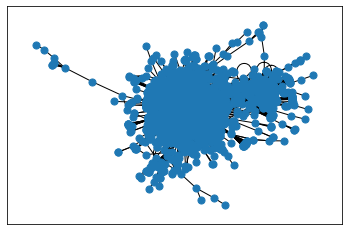

In [ ]:
print('\n\n Graphical Representation of G: \n\n')
nx.draw_networkx(G,with_labels=False, node_size=50)

## 2.Implementation of the algorithms

### 2.1 Louvain

#### Code

In [ ]:
pip install python-louvain

In [ ]:
import community.community_louvain as community_louvain

In [ ]:
#first compute the best partition
partition = community_louvain.best_partition(G)

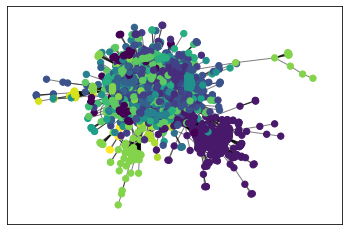

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

#### Modularity

#### Investigation of the Three Largest Communities

In [ ]:
#Modularity of Louvain
community_louvain.modularity(partition, G, weight='weight')

In [ ]:
#Count nodes in each community and sort them from smallest to largest
#The three largest communities in the network we are working on are: 5,3 and 2
from collections import Counter

countnodes = Counter(partition.values())
sortedcountnodes = sorted(countnodes.items(), key=lambda x:x[1])
sortedcountnodesd = dict(sortedcountnodes)

print(sortedcountnodesd)

In [ ]:
#number of communities
len(countnodes)

In [ ]:
#find all nodes in three largest communities (, 8 and 12)
firstlargestpartition=list([k for k, v in partition.items() if v == 5])
secondlargestpartition=list([k for k, v in partition.items() if v == 3])
thirdlargestpartition=list([k for k, v in partition.items() if v == 2])

#print the nodes in each of the three largest communities
print(len(firstlargestpartition),firstlargestpartition)
print(len(secondlargestpartition),secondlargestpartition)
print(len(thirdlargestpartition),thirdlargestpartition)

##### First Largest Community

In [ ]:
#find which nodes belong to each party in firstlargestcommunity
party1=[]
for k in firstlargestpartition:
  if k in nattributes.keys():
    party1.append(nattributes[k]['party'])

In [ ]:
#count the nodes in each party in firstlargestcommunity
countfirst=pd.value_counts(np.array(party1))
print(countfirst)

In [ ]:
#Count percentage or partys in firstlargestcommunity

for i in countfirst:
  print((i/len(firstlargestpartition))*100,'%')

In [ ]:
#create subgraph of firstlargestcommunity
subgrfirstlarge = G.subgraph(firstlargestpartition)

In [ ]:
#compute average clustering coefficient for firstlargestcommunity
print(nx.average_clustering(subgrfirstlarge))

In [ ]:
#compute clustering coefficient for firstlargestcommunity

clustercoeffirstlarge=nx.clustering(subgrfirstlarge)
print(clustercoeffirstlarge)

In [ ]:
#compute density for firstlargestcommunity

densityfirstlarge=nx.density(subgrfirstlarge)
print(densityfirstlarge)

In [ ]:
#compute diameter for firstlargestcommunity

diameterfirstlarge=nx.diameter(subgrfirstlarge)
print(diameterfirstlarge)

In [ ]:
#compute average path length for firstlargestcommunity

avgplengthfirstlarge=nx.average_shortest_path_length(subgrfirstlarge)
print(avgplengthfirstlarge)

##### Second Largest Community

In [ ]:
#find which nodes belong to each party in secondlargestcommunity
party2=[]
for k in secondlargestpartition:
  if k in nattributes.keys():
    party2.append(nattributes[k]['party'])

In [ ]:
#count the nodes in each party in secondlargestcommunity
countsecond=pd.value_counts(np.array(party2))
print(countsecond)

In [ ]:
#Count percentage of partys in secondlargestcommunity

for i in countsecond:
  print((i/len(secondlargestpartition))*100,'%')

In [ ]:
#create subgraph of secondlargestcommunity
subgrsecondlarge = G.subgraph(secondlargestpartition)

In [ ]:
#compute average clustering coefficient for secondlargestcommunity
print(nx.average_clustering(subgrsecondlarge))

In [ ]:
#compute clustering coefficient for secondlargestcommunity

clustercoefsecondlarge=nx.clustering(subgrsecondlarge)
print(clustercoefsecondlarge)

In [ ]:
#compute density for secondlargestcommunity

densitysecondlarge=nx.density(subgrsecondlarge)
print(densitysecondlarge)

In [ ]:
#compute diameter for secondlargestcommunity

diametersecondlarge=nx.diameter(subgrsecondlarge)
print(diametersecondlarge)

In [ ]:
#compute average path length for secondlargestcommunity

avgplengthsecondlarge=nx.average_shortest_path_length(subgrsecondlarge)
print(avgplengthsecondlarge)

##### Third Largest Community

In [ ]:
#find which nodes belong to each party in thirdlargestcommunity
party3=[]
for k in thirdlargestpartition:
  if k in nattributes.keys():
    party3.append(nattributes[k]['party'])

In [ ]:
#count the nodes in each party in thirdlargestcommunity
countthird=pd.value_counts(np.array(party3))
print(countthird)

In [ ]:
#Count percentage of partys in thirdlargestcommunity

for i in countthird:
  print((i/len(thirdlargestpartition))*100,'%')

In [ ]:
#create subgraph of thirdlargestcommunity
subgrthirdlarge = G.subgraph(thirdlargestpartition)

In [ ]:
#compute average clustering coefficient for thirdlargestcommunity
print(nx.average_clustering(subgrthirdlarge))

In [ ]:
#compute clustering coefficient for thirdlargestcommunity
clcoef3=nx.clustering(G, nodes=thirdlargestpartition, weight='weights')
print(clcoef3)

In [ ]:
#compute clustering coefficient for thirdlargestcommunity

clustercoefthirdlarge=nx.clustering(subgrthirdlarge)
print(clustercoefthirdlarge)

In [ ]:
#compute density for thirdlargestcommunity

densitythirdlarge=nx.density(subgrthirdlarge)
print(densitythirdlarge)

In [ ]:
#compute diameter for thirdlargestcommunity

diameterthirdlarge=nx.diameter(subgrthirdlarge)
print(diameterthirdlarge)

In [ ]:
#compute average path length for thirdlargestcommunity

avgplengththirdlarge=nx.average_shortest_path_length(subgrthirdlarge)
print(avgplengththirdlarge)

### 2.2 Label Propagation

#### Code - Modularity

In [ ]:
import networkx.algorithms.community as nx_comm

In [ ]:
comm_lp = nx_comm.label_propagation_communities(G)

In [ ]:
nx_comm.modularity(G, comm_lp)

In [ ]:
s = pd.Series(comm_lp)
comm_df = pd.DataFrame(columns = ['Id', 'community'])

for i in range(0, len(comm_lp)):
  temp_df = pd.DataFrame()
  temp_df['Id'] = np.array(list(s[i]))
  temp_df['community']= i
  comm_df = pd.concat([comm_df, temp_df])

comm_df['modularity'] = nx_comm.modularity(G, comm_lp)
comm_df.to_csv(r'communities_lp.csv', index = False, header=True)

### 2.3 Balanced Link Density-based Label Propagation (BLDLP)

#### Code

In [ ]:
# calculate weights
alpha = 15

weights_dict = dict()

for one_G_edge in G.edges:
  v = one_G_edge[0]
  u = one_G_edge[1]

  #get neighborhood of v
  neighborhood_v = list(G.neighbors(v))
    
  #find edges of neighborhood
  edges_neigh_v = list()
  for one_neighbor in neighborhood_v:
    edges_neigh_v.extend(list(G.edges(one_neighbor)))

  edges_v_u = list()
  for one_edge in edges_neigh_v:
    if u in one_edge:
      continue;
    else: 
      edges_v_u.append(tuple(one_edge))

  #calculate weight of edge
  strenght_u_v = len(set(edges_v_u)) + 1
  weight_u_v = math.floor(alpha/strenght_u_v)
  weights_dict[one_G_edge]= weight_u_v

In [ ]:
nx.set_edge_attributes(G, weights_dict, "weights")

In [ ]:
# code retrieved from https://networkx.org/documentation/networkx-2.0/_modules/networkx/algorithms/community/asyn_lpa.html
# with fixed bug in return and added max iterations 

from collections import Counter
import random

from networkx.utils import groups

def asyn_lpa_communities(G, max_iter, weight=None):

    labels = {n: i for i, n in enumerate(G)}
    cont = True

    for i in range(0, max_iter):
        cont = False
        nodes = list(G)
        random.shuffle(nodes)
        # Calculate the label for each node
        for node in nodes:
            if len(G[node]) < 1:
                continue

            # Get label frequencies. Depending on the order they are processed
            # in some nodes with be in t and others in t-1, making the
            # algorithm asynchronous.
            label_freq = Counter()
            for v in G[node]:
                label_freq.update({labels[v]: 1})

            # Choose the label with the highest frecuency. 
            max_freq = max(label_freq.values())
            best_labels = [label for label, freq in label_freq.items()
                           if freq == max_freq]

            # if there is a tie, use edge weights
            if (len(best_labels)>1):
              label_freq = Counter()
              for v in G[node]:
                  label_freq.update({labels[v]: G.edges[v, node][weight]
                                      if weight else 1})
              # Choose the label with the highest frecuency, based on weights
              max_freq = max(label_freq.values())
              best_labels = [label for label, freq in label_freq.items()
                            if freq == max_freq]

            # if still a tie, choose randomly
            new_label = random.choice(best_labels)
            labels[node] = new_label

            cont = cont or len(best_labels) > 1

        # Break if all nodes have a label that is better than other
        # neighbour labels (only one label has max_freq for each node).
        if not cont: break

    return groups(labels).values()

#### Modularity

In [ ]:
#Modularity of BLDLP
comm_weightslp = asyn_lpa_communities(G, 10000, weight="weights")

nx_comm.modularity(G, comm_weightslp)

In [ ]:
s = pd.Series(comm_weightslp)
comm_df = pd.DataFrame(columns = ['Id', 'community'])

for i in range(0, len(comm_weightslp)):
  temp_df = pd.DataFrame()
  temp_df['Id'] = np.array(list(s[i]))
  temp_df['community']= i
  comm_df = pd.concat([comm_df, temp_df])

comm_df['modularity'] = nx_comm.modularity(G, comm_weightslp)
comm_df.to_csv(r'communities_bldlp_15.csv', index = False, header=True)

#### Investigation of the Three Largest Communities

In [ ]:
# number of nodes in each community
size_comms = comm_df['community'].value_counts()

In [ ]:
#number of communities detected
len(size_comms)

##### First Largest Community

In [ ]:
comm_nodes = np.array(list(list(comm_weightslp)[size_comms.index[0]])).astype(int).tolist()


Gcomm1= G.subgraph(comm_nodes)

print("First community \n" + str(size_comms[size_comms.index[0]]))

print("Percentages \n")
comm1_df = gephi_df.loc[gephi_df['Id'].isin(list(Gcomm1.nodes))]
print(comm1_df['party'].value_counts(normalize=True) * 100)
print("\n")
print("Community Density: " + str(nx.density(Gcomm1)) +"\n")
print("Clustering coefficient: " + str(nx.average_clustering(Gcomm1))+"\n")

In [ ]:
print("Diameter: " + str(nx.diameter(Gcomm1))+"\n")

In [ ]:
print("Average shortest path length: " + str(nx.average_shortest_path_length(Gcomm1))+"\n")

##### Second Largest Community

In [ ]:
comm_nodes = np.array(list(list(comm_weightslp)[size_comms.index[1]])).astype(int).tolist()


Gcomm1= G.subgraph(comm_nodes)

print("First community \n" + str(size_comms[size_comms.index[1]]))

print("Percentages \n")
comm1_df = gephi_df.loc[gephi_df['Id'].isin(list(Gcomm1.nodes))]
print(comm1_df['party'].value_counts(normalize=True) * 100)
print("\n")
print("Community Density: " + str(nx.density(Gcomm1)) +"\n")
print("Clustering coefficient: " + str(nx.average_clustering(Gcomm1))+"\n")

In [ ]:
print("Diameter: " + str(nx.diameter(Gcomm1))+"\n")

In [ ]:
print("Average shortest path length: " + str(nx.average_shortest_path_length(Gcomm1))+"\n")

##### Third Largest Community

In [ ]:
comm_nodes = np.array(list(list(comm_weightslp)[size_comms.index[2]])).astype(int).tolist()


Gcomm1= G.subgraph(comm_nodes)

print("First community \n" + str(size_comms[size_comms.index[2]]))

print("Percentages \n")
comm1_df = gephi_df.loc[gephi_df['Id'].isin(list(Gcomm1.nodes))]
print(comm1_df['party'].value_counts(normalize=True) * 100)
print("\n")
print("Community Density: " + str(nx.density(Gcomm1)) +"\n")
print("Clustering coefficient: " + str(nx.average_clustering(Gcomm1))+"\n")

In [ ]:
print("Diameter: " + str(nx.diameter(Gcomm1))+"\n")

In [ ]:
print("Average shortest path length: " + str(nx.average_shortest_path_length(Gcomm1))+"\n")

### 2.4 Fast Greedy

#### Code

In [ ]:
#implementing Fast Greedy algorithm
fast_greedy_com = nx.algorithms.community.greedy_modularity_communities(G,  weight=None)
commun = sorted(fast_greedy_com, reverse=True)
com_list = [set(x) for x in commun]
print('number of communities',len(com_list))
for i in range(len(com_list)):
    print('nodes in community',i,':',len(com_list[i]))

#### Modularity

In [ ]:
modular = nx.algorithms.community.modularity(G,com_list)
print("Modularity of Partition based on Fast Greedy algorithm",modular)

In [ ]:
#create a dictionary [node_id:community_label]
partition = dict()
for i in range(len(com_list)):
  for node in com_list[i]:
    partition[node] = i

partition_df = pd.DataFrame(partition.items(), columns=['Id', 'Label'])
partition_df.to_csv (r'fastgreedypartition.csv', index = False, header=True)

### 2.6 Deep Nonlinear Reconstruction

#### Code - Modularity - Investigation of the Three Largest Communities


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
#Implementing Autoencoder-based model
from keras import backend as K

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from tensorflow.keras.models import load_model
from keras.regularizers import l2
import h5py

def train_ffae(mod_arr):
    '''trains a feedforward autoencoder'''

    #X_train, X_train_noise, X_val, X_val_noise = get_data_ff(folders)
    n_inputs = mod_arr.shape[1]
    # encoder 
    inp = Input(shape=(n_inputs,))    
    enc = Dense(512, activation='tanh')(inp)
    bottleneck = Dense(256, activation='tanh')(enc)
    #decoder
    dec = Dense(512, activation='tanh')(bottleneck)
    # output layers
    output = Dense(n_inputs)(dec)
    #autoencoder model
    model = Model(inputs=inp, outputs=output)
    encoder = Model(inputs=inp, outputs=bottleneck)
    adam = tf.keras.optimizers.Adam(lr=0.01)
    encoder.compile(loss='mean_squared_error' , optimizer = adam)
    sgd = tf.keras.optimizers.SGD(lr=0.01)  
    model.compile(loss='mean_squared_error' , optimizer = adam)
    print(model.summary())
       
    filepath = 'autoenc.h5'
     
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=2, 
                                 save_best_only=True)    
    early_stopping_monitor = EarlyStopping(patience=40, monitor='loss')    
    
    model.fit(mod_arr,mod_arr,batch_size=64,epochs=30000,shuffle=True,
        verbose=2,callbacks=[early_stopping_monitor,checkpoint])
   
    encoder.save('encoder.h5')    
    

def run_kmeans(g, H1, nodes, clusters):
    #kmeans for a range of number of clusters

    modular,all_labels, all_partitions, sil = [], [], [], []
    for i in range(2,clusters):
        clust = i

        kmeans = KMeans(n_clusters=clust)
        kmeans = kmeans.fit(H1)
        labels = kmeans.labels_
        labels = np.array(labels)
        all_labels.append(labels)
        sil.append(metrics.silhouette_score(H1, labels))    
        node_per_comm = Counter(labels)

        partition=[]
        for clust_id in range(clust): 
            nodes_per_com = nodes[np.where(labels==clust_id)]
            nodes_per_com = set(nodes_per_com)
            partition.append(nodes_per_com)
        all_partitions.append(partition)
        
        import networkx.algorithms.community as nx_comm
        modular.append(nx_comm.modularity(g,partition))
    modular=np.array(modular)


    #get max modularity & number of clusters for that
    best_mod_id = np.where(modular==max_mod)[0][0]
    best_clust = best_mod_id+2
    best_part = all_partitions[best_mod_id]
    print('max modularity:', max_mod,'for', best_clust, 'clusters')

    #get the partition that gives best modularity
    best_labels = all_labels[best_mod_id]
    partition_dict = dict()
    for i in range(len(nodes)):
        partition_dict[nodes[i]] =  best_labels[i]
    partition_df = pd.DataFrame(partition_dict.items(), columns=['Id', 'Label'])
    partition_df.to_csv (r'DNRpartition.csv', index = False, header=True)
    return best_labels, best_clust, best_part


def party_analysis(attrib, partition,i):
    #get the nodes & corresponding labels for which we have information

    party, final_nodes = [], []
    for n in partition:
        if n in attrib.keys():
            final_nodes.append(n)
            party.append(attrib[n]['party'])
  
    party = np.array(party) 
    print('number of annotated nodes in community', i, 'is', len(final_nodes)) 
    node_per_comm = Counter(party)
    print('party distribution for ', i, ' community',node_per_comm)


def commun_alalysis(G, partition, attrib):
    '''conduct analysis on community level'''

    commun_list = []
    i = 0
    for c in partition:
        commun_list.append(list(c))
        print('number of nodes in community:', i, 'is', len(c))
        i += 1

    commun_list.sort(key=len, reverse=True)
    for i in range(3):
        party_analysis(attrib, commun_list[i],i)
        comm_subgr = G.subgraph(commun_list[i])
        print('density of community:', i ,'is ', nx.density(comm_subgr))
        print('average clustering coefficient of community:', i ,'is ',nx.average_clustering(comm_subgr))
        if nx.is_connected(comm_subgr):
            print('diameter of community:', i ,'is ',nx.diameter(comm_subgr))
            print('avg shortest path length:', i ,'is ',nx.average_shortest_path_length(comm_subgr))
        else:
            print('community:', i ,'is not connected')
            print('number of isolated nodes in community', i, 'is:', len(list(nx.isolates(comm_subgr))))

B = nx.modularity_matrix(G)
B = np.array(B)
train_ffae(B)
encoder = load_model('encoder.h5')
H1 = encoder.predict(B)
best_labels, best_clust, best_partition = run_kmeans(G, H1, nodes, clusters=50)
print('number of detected communities:', len(best_partition))
commun_alalysis(G, best_partition, nattributes)       


